# 📘 Enzyme Kinetics: Michaelis-Menten Analysis> Fit Michaelis-Menten model to enzyme velocity data⏱️ **15-25 minutes** | 📊 **Level: ●●○ Intermediate** | 🏷️ **Biology** | 🔬 **Biochemistry**---

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/imewei/NLSQ/blob/main/examples/notebooks/04_gallery/biology/enzyme_kinetics.ipynb)


In [1]:
# @title Install NLSQ (run once in Colab)
import sys

if 'google.colab' in sys.modules:
    print("Running in Google Colab - installing NLSQ...")
    !pip install -q nlsq
    print("✅ NLSQ installed successfully!")
else:
    print("Not running in Colab - assuming NLSQ is already installed")

Not running in Colab - assuming NLSQ is already installed


## 🔬 Domain Background**Model:** $v = \frac{V_{max}[S]}{K_m + [S]}$**Applications:** Enzyme characterization, drug screening---

## Setup

In [2]:
# Configure matplotlib for inline plotting in VS Code/Jupyter
# MUST come before importing matplotlib
%matplotlib inline

In [3]:
from IPython.display import display

In [4]:
import jax.numpy as jnp
import matplotlib.pyplot as plt
import numpy as np

from nlsq import curve_fit


def michaelis_menten(S, Vmax, Km):
    return Vmax * S / (Km + S)

## Generate Data

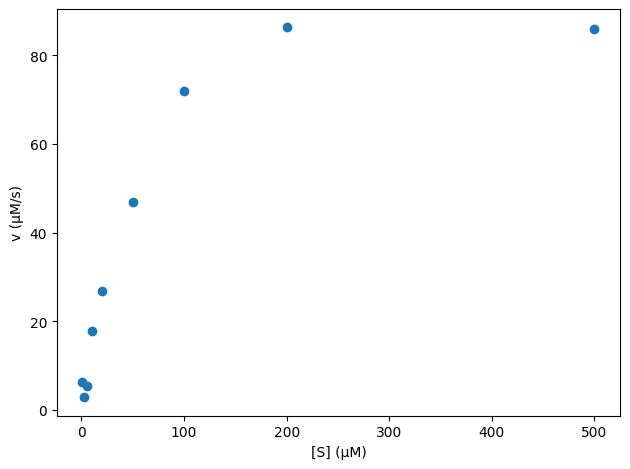

In [5]:
Vmax_true, Km_true = 100, 50
S = np.array([1,2,5,10,20,50,100,200,500])
v_true = michaelis_menten(S, Vmax_true, Km_true)
v = v_true + np.random.normal(0, 3, len(S))

plt.plot(S, v, 'o')
plt.xlabel('[S] (µM)')
plt.ylabel('v (µM/s)')
plt.tight_layout()
plt.tight_layout()
plt.show()


## Fit Model

In [6]:
popt, pcov = curve_fit(michaelis_menten, S, v, p0=[80, 40])
Vmax_fit, Km_fit = popt

print(f'Vmax: {Vmax_fit:.1f} µM/s')
print(f'Km: {Km_fit:.1f} µM')

INFO:nlsq.curve_fit:Starting curve fit n_params=2 | n_data_points=9 | method=trf | solver=auto | batch_size=None | has_bounds=False | dynamic_sizing=False


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=2 | loss=linear | ftol=1.0000e-08 | xtol=1.0000e-08 | gtol=1.0000e-08


INFO:nlsq.optimizer.trf:Starting TRF optimization (no bounds) n_params=2 | n_residuals=9 | max_nfev=None


PERFORMANCE:nlsq.optimizer.trf:Iteration iter=0 | cost=392.5542566075975 | grad_norm=39.4113 | nfev=1


PERFORMANCE:nlsq.optimizer.trf:Iteration iter=1 | cost=68.89249428726819 | grad_norm=1.7422 | step=89.44271909999159 | nfev=2


PERFORMANCE:nlsq.optimizer.trf:Iteration iter=2 | cost=67.72646063055751 | grad_norm=0.0997 | step=89.44271909999159 | nfev=3


PERFORMANCE:nlsq.optimizer.trf:Iteration iter=3 | cost=67.71585819252732 | grad_norm=0.0091 | step=89.44271909999159 | nfev=4


PERFORMANCE:nlsq.optimizer.trf:Iteration iter=4 | cost=67.71573354142905 | grad_norm=0.0010 | step=89.44271909999159 | nfev=5


PERFORMANCE:nlsq.optimizer.trf:Iteration iter=5 | cost=67.71573194343009 | grad_norm=1.1759e-04 | step=89.44271909999159 | nfev=6


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=2.167094s


INFO:nlsq.least_squares:Convergence reason=`ftol` termination condition is satisfied. | iterations=6 | final_cost=67.7157 | elapsed=2.167s | final_gradient_norm=1.3275e-05


PERFORMANCE:nlsq.curve_fit:Timer: curve_fit elapsed=2.866842s


INFO:nlsq.curve_fit:Curve fit completed total_time=2.8668 | final_cost=135.4315 | covariance_warning=False


Vmax: 100.6 µM/s
Km: 49.5 µM


## Key Insights1. **Km indicates affinity** - Lower Km = higher substrate affinity2. **Vmax depends on enzyme amount**---